In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
salary_data = pd.read_csv("/salaries.csv")
salary_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Data Engineer,204662,USD,204662,US,0,US,M
1,2024,SE,FT,Data Engineer,184662,USD,184662,US,0,US,M
2,2024,MI,FT,Data Scientist,179000,USD,179000,US,0,US,M
3,2024,MI,FT,Data Scientist,112000,USD,112000,US,0,US,M
4,2024,EN,FT,Data Analyst,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
11062,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
11063,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
11064,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
11065,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
salary_data['salary']

0         204662
1         184662
2         179000
3         112000
4         115000
          ...   
11062     412000
11063     151000
11064     105000
11065     100000
11066    7000000
Name: salary, Length: 11067, dtype: int64

In [11]:
# Let's do one_hot_encoding to our dataframe

salaries_one_hot = pd.get_dummies(salary_data)
salaries_one_hot.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,2024,204662,204662,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2024,184662,184662,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2024,179000,179000,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2024,112000,112000,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2024,115000,115000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
# Create X and Y values (features and labels)

x = salaries_one_hot.drop("work_year", axis=1)
y = salaries_one_hot["salary"]

In [13]:
# View X
x.head()

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,204662,204662,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,184662,184662,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,179000,179000,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,112000,112000,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,115000,115000,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [14]:
# View y
y.head()

0    204662
1    184662
2    179000
3    112000
4    115000
Name: salary, dtype: int64

In [15]:
# Create training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test), len(y_train), len(y_test)

(11067, 8853, 2214, 8853, 2214)

In [20]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model

salary_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

salary_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(), # SGD was not working
    metrics=["mae"]
)

# Fit Model

salary_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
277/277 [==============================] - 1s 2ms/step - loss: 40569.9570 - mae: 40569.9570
Epoch 2/100
277/277 [==============================] - 1s 2ms/step - loss: 9835.8555 - mae: 9835.8555
Epoch 3/100
277/277 [==============================] - 1s 2ms/step - loss: 8171.7954 - mae: 8171.7954
Epoch 4/100
277/277 [==============================] - 1s 2ms/step - loss: 6487.5371 - mae: 6487.5371
Epoch 5/100
277/277 [==============================] - 1s 2ms/step - loss: 4636.6553 - mae: 4636.6553
Epoch 6/100
277/277 [==============================] - 1s 2ms/step - loss: 2508.7380 - mae: 2508.7380
Epoch 7/100
277/277 [==============================] - 0s 2ms/step - loss: 642.3469 - mae: 642.3469
Epoch 8/100
277/277 [==============================] - 0s 2ms/step - loss: 296.9802 - mae: 296.9802
Epoch 9/100
277/277 [==============================] - 0s 2ms/step - loss: 283.5844 - mae: 283.5844
Epoch 10/100
277/277 [==============================] - 0s 2ms/step - loss: 334.6996 -

In [17]:
# Check the results of salaries model on the test data

salary_model.evaluate(x_test, y_test)

70/70 [==============================] - 0s 1ms/step - loss: nan - mae: nan


[nan, nan]

#Right now it looks our model isn't performing too well.. let's try and improve it!.

In [23]:
# set Random Seed
tf.random.set_seed(42)

# 1. Create the model

salaries_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the Model
salaries_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),# SGD was not working
    metrics=["mae"]
)

# 3. Fit the model
salaries_model_2.fit(x_train, y_train, epochs=100, verbose=1)


Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 10657.4023 - mae: 10657.4023
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 1098.6884 - mae: 1098.6884
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 1445.0293 - mae: 1445.0293
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 1730.5370 - mae: 1730.5370
Epoch 5/100
277/277 [==============================] - 1s 2ms/step - loss: 1711.6497 - mae: 1711.6497
Epoch 6/100
277/277 [==============================] - 0s 2ms/step - loss: 1489.4364 - mae: 1489.4364
Epoch 7/100
277/277 [==============================] - 0s 2ms/step - loss: 1055.5863 - mae: 1055.5863
Epoch 8/100
277/277 [==============================] - 0s 2ms/step - loss: 1469.9022 - mae: 1469.9022
Epoch 9/100
277/277 [==============================] - 0s 2ms/step - loss: 1319.1967 - mae: 1319.1967
Epoch 10/100
277/277 [==============================] - 0s 2ms/step - loss: 1115

In [24]:
# Evaluate the larger model

salaries_model_2.evaluate(x_test, y_test)

70/70 [==============================] - 0s 1ms/step - loss: 645.4495 - mae: 645.4495


[645.449462890625, 645.449462890625]

In [28]:
# set Random Seed
tf.random.set_seed(42)

# 1. Create the model

salaries_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the Model
salaries_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),# SGD was not working
    metrics=["mae"]
)

# 3. Fit the model
history = salaries_model_3.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
277/277 [==============================] - 1s 2ms/step - loss: 13561.7744 - mae: 13561.7744
Epoch 2/200
277/277 [==============================] - 1s 3ms/step - loss: 1233.3669 - mae: 1233.3669
Epoch 3/200
277/277 [==============================] - 1s 3ms/step - loss: 1210.4412 - mae: 1210.4412
Epoch 4/200
277/277 [==============================] - 1s 2ms/step - loss: 1343.8755 - mae: 1343.8755
Epoch 5/200
277/277 [==============================] - 1s 4ms/step - loss: 1161.0123 - mae: 1161.0123
Epoch 6/200
277/277 [==============================] - 1s 2ms/step - loss: 1177.6051 - mae: 1177.6051
Epoch 7/200
277/277 [==============================] - 0s 2ms/step - loss: 1323.0094 - mae: 1323.0094
Epoch 8/200
277/277 [==============================] - 0s 2ms/step - loss: 963.5510 - mae: 963.5510
Epoch 9/200
277/277 [==============================] - 0s 2ms/step - loss: 1538.5042 - mae: 1538.5042
Epoch 10/200
277/277 [==============================] - 0s 2ms/step - loss: 1212.1

In [26]:
salaries_model_3.fit(x_test, y_test)

70/70 [==============================] - 0s 3ms/step - loss: 1213.2789 - mae: 1213.2789


Text(0.5, 0, 'epochs')

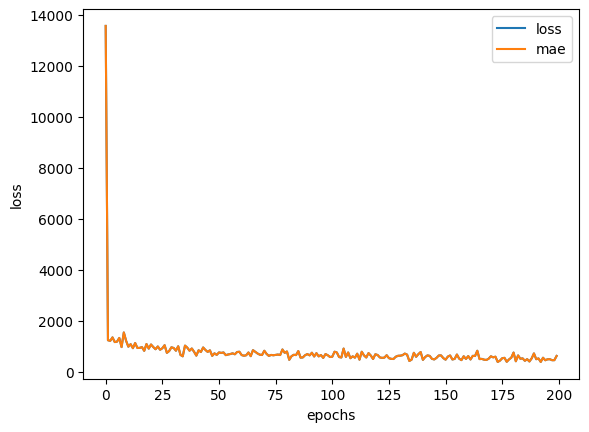

In [29]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Downfall pink line model loss keep decreasing.  

❓**Question** How long we should train for?

EarlyStopping CallBack, which is a TensorFlow component you can add to your model to stop training on improving a ceratin metric.

#Preprocessing data (normalization and standardization)

Normalization is scaling the data to be analyzed to a specific range such as [0.0, 1.0] to provide better results.

In terms of scaling values, neural networks tend to prefer normalization.